##### Exploratory Data Analysis

Dataset: https://www.kaggle.com/usgs/earthquake-database

I am trying to answer the below questions:
 
* 1) Highest number of earthquakes occurrences classified yearly?
* 2) Locations with the highest number of earthquakes occurrences?
* 3) Classification based on magnitude values?
* 4) Classification based on magnitude types?
* 5) Severity of the earthquakes vs count?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

plt.rcParams['figure.figsize'] = (15, 9)

dataset = pd.read_csv("earthquake_database.csv")
dataset.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/65,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/65,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/65,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/65,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/65,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [2]:
#Describe data
dataset.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [3]:
#Table shape
dataset.shape

(23412, 21)

In [4]:
#Data information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
Date                          23412 non-null object
Time                          23412 non-null object
Latitude                      23412 non-null float64
Longitude                     23412 non-null float64
Type                          23412 non-null object
Depth                         23412 non-null float64
Depth Error                   4461 non-null float64
Depth Seismic Stations        7097 non-null float64
Magnitude                     23412 non-null float64
Magnitude Type                23409 non-null object
Magnitude Error               327 non-null float64
Magnitude Seismic Stations    2564 non-null float64
Azimuthal Gap                 7299 non-null float64
Horizontal Distance           1604 non-null float64
Horizontal Error              1156 non-null float64
Root Mean Square              17352 non-null float64
ID                            23412 non-null object
Sou

In [5]:
#Null values count
dataset.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

Create backup of the dataset

In [6]:
backup_data = dataset.copy()

Dropping NaN values

In [7]:
backup_data.dropna()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
565,12/20/66,15:30:01,37.302167,-116.408333,Nuclear Explosion,1.20,31.61,16.0,5.62,ML,...,10.0,261.00,1.476000,99.000,0.8600,CI3329931,CI,CI,CI,Reviewed
897,04/26/68,15:00:02,37.295333,-116.455667,Nuclear Explosion,1.20,31.61,17.0,5.63,ML,...,6.0,261.00,1.438000,99.000,1.0300,CI3342128,CI,CI,CI,Reviewed
1129,12/19/68,16:30:01,37.231500,-116.473667,Nuclear Explosion,1.40,31.61,16.0,5.52,ML,...,6.0,257.00,1.415000,99.000,1.3600,CI3342181,CI,CI,CI,Reviewed
1380,09/16/69,14:30:01,37.314167,-116.460667,Nuclear Explosion,1.20,31.61,13.0,5.82,ML,...,8.0,268.00,1.437000,99.000,0.3300,CI3326197,CI,CI,CI,Reviewed
1532,03/26/70,19:00:01,37.300500,-116.534167,Nuclear Explosion,1.20,31.61,16.0,5.54,ML,...,10.0,260.00,1.377000,99.000,0.3500,CI3325031,CI,CI,CI,Reviewed
2723,06/06/73,13:00:01,37.245000,-116.346000,Nuclear Explosion,1.10,31.61,17.0,5.64,ML,...,8.0,259.00,1.517000,99.000,0.5500,CI3319623,CI,CI,CI,Reviewed
3307,11/22/74,16:25:34,30.250000,-114.800000,Earthquake,6.00,31.61,20.0,5.55,ML,...,4.0,312.00,2.641000,99.000,3.2200,CI3319062,CI,CI,CI,Reviewed
3516,06/26/75,12:30:01,37.278833,-116.368667,Nuclear Explosion,6.00,31.61,19.0,5.52,ML,...,13.0,260.00,1.504000,99.000,3.4400,CI12328563,CI,CI,CI,Reviewed
3673,10/28/75,14:30:00,37.290167,-116.411500,Nuclear Explosion,1.30,31.61,19.0,5.67,ML,...,8.0,260.00,1.472000,99.000,2.7500,CI3006257,CI,CI,CI,Reviewed
3754,01/03/76,19:15:01,37.296500,-116.333167,Nuclear Explosion,1.50,31.61,20.0,5.84,ML,...,8.0,261.00,1.534000,99.000,0.4400,CI3001652,CI,CI,CI,Reviewed


In [8]:
backup_data.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [9]:
#Q1 - Which year had the maximum number of earthquake occurances?
import datetime

backup_data['Date'] = backup_data['Date'].apply(lambda x: pd.to_datetime(x))
backup_data['Year'] = backup_data['Date'].apply(lambda x: str(x).split('-')[0])
backup_data['Year'].value_counts()[:1]

2011    713
Name: Year, dtype: int64

So I figured out that 2011 witnessed the maximum number of earthquakes, 713

------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------

So, there are two types of source fields in the data. One is Location Source and one is Magnitude Source.
I have assumed that, Location Source is place where the earthquake had an impact while the Magnitude Source is where it originated from.

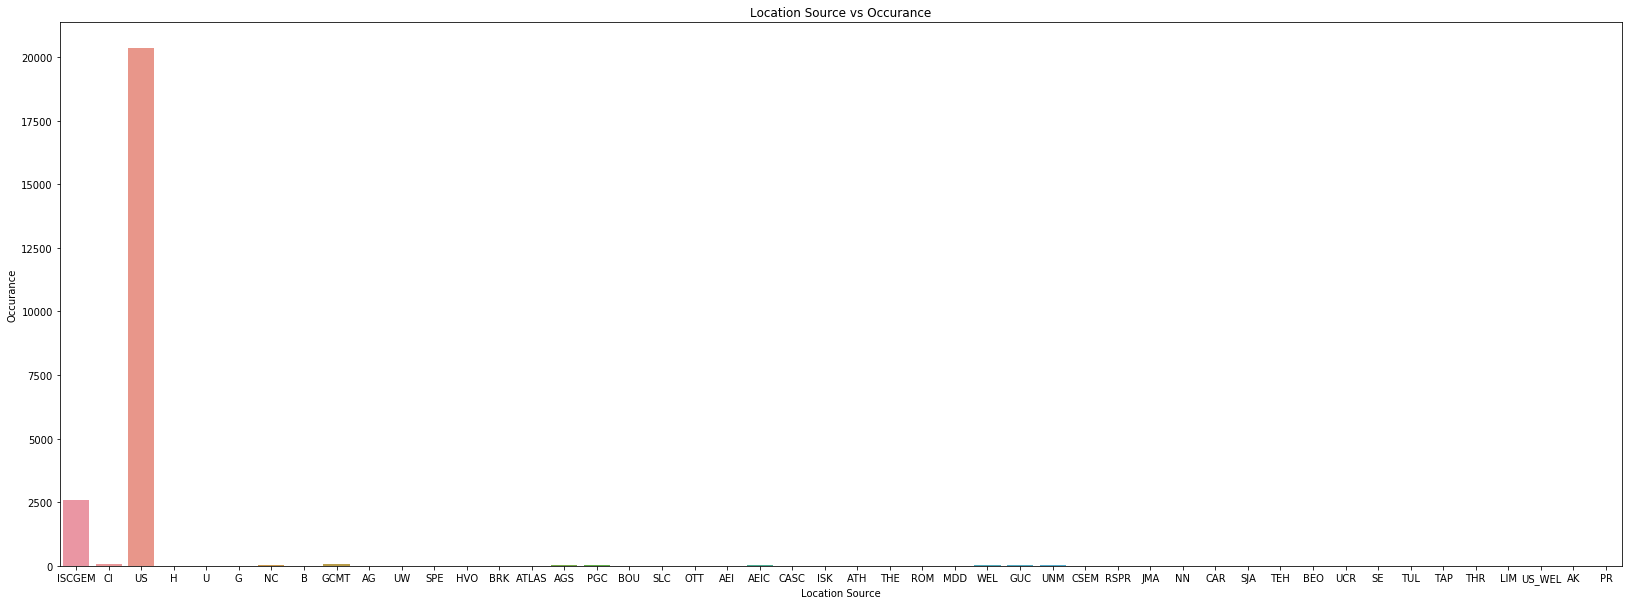

In [10]:
#Q2 - Which are the places where earthquakes occur the most?
# plot location Source Frequency using bar chart
plt.figure(figsize=(28, 10))
sns.countplot(x="Location Source", data=backup_data)
plt.ylabel('Occurance')
plt.title('Location Source vs Occurance')
plt.show()

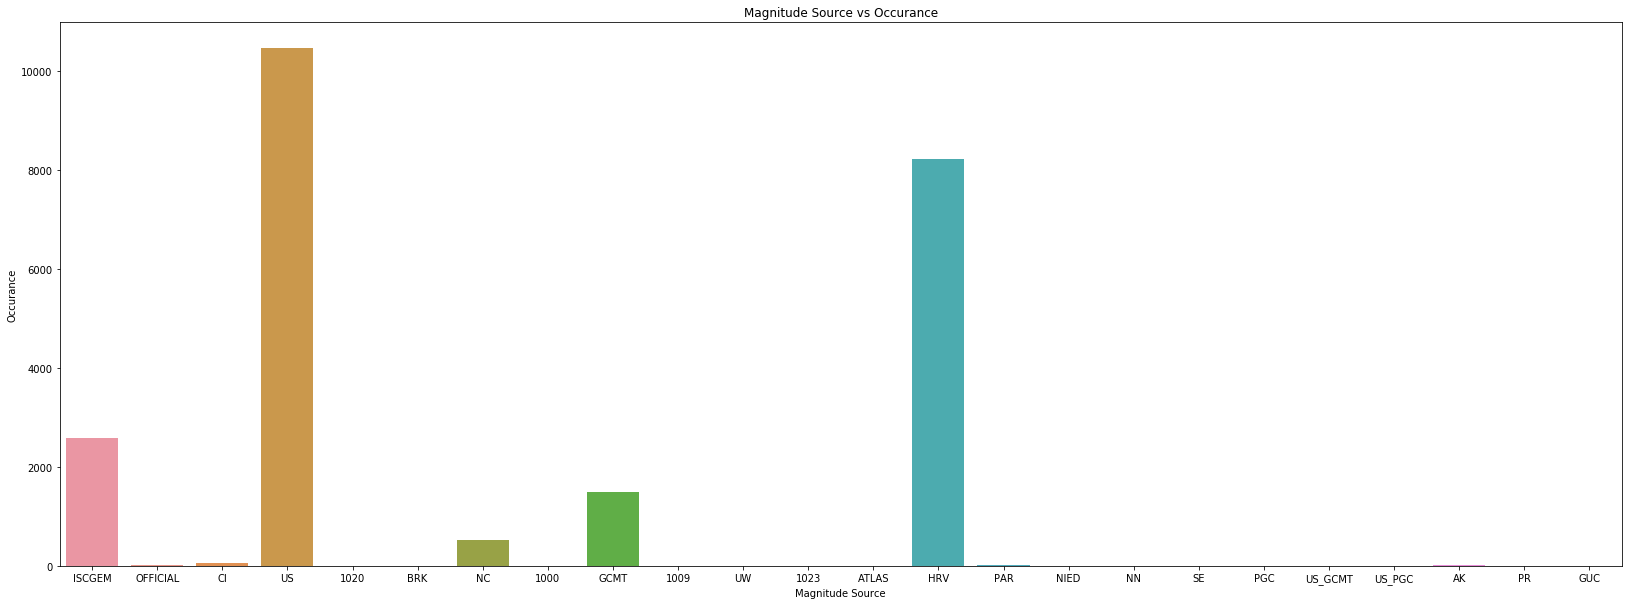

In [11]:
#Q2.a) Place where earthquakes originate using bar chart
#plot Magnitude Source Frequency
plt.figure(figsize=(28, 10))
sns.countplot(x="Magnitude Source", data=backup_data)
plt.ylabel('Occurance')
plt.title('Magnitude Source vs Occurance')
plt.show()

To get a count for the abpve graphs plotted, I did the below:

In [12]:
#Count for Location Source
backup_data['Location Source'].value_counts()

US        20350
ISCGEM     2581
CI           61
GCMT         56
NC           54
GUC          46
AEIC         40
UNM          21
PGC          19
WEL          18
AGS          17
ISK          15
ATH          14
AK           14
HVO          12
SPE          10
AEI           7
ROM           7
TEH           7
H             7
UW            6
CASC          4
US_WEL        4
NN            4
ATLAS         3
RSPR          3
JMA           3
THR           3
THE           3
B             2
TUL           2
MDD           2
G             2
TAP           1
UCR           1
AG            1
BOU           1
BEO           1
SE            1
CAR           1
SJA           1
CSEM          1
SLC           1
U             1
BRK           1
OTT           1
PR            1
LIM           1
Name: Location Source, dtype: int64

In [13]:
#Count for Magnitude Source
backup_data['Magnitude Source'].value_counts()

US          10458
HRV          8223
ISCGEM       2580
GCMT         1489
NC            533
CI             61
AK             12
PAR             9
OFFICIAL        8
UW              6
GUC             6
NN              4
NIED            4
1000            3
US_GCMT         3
ATLAS           3
PGC             2
BRK             2
1020            1
1009            1
SE              1
PR              1
US_PGC          1
1023            1
Name: Magnitude Source, dtype: int64

To find out the top 5 locations in both, I have sliced the data

In [14]:
#Top 5 Sources for Location Source
backup_data['Location Source'].value_counts()[:5]

US        20350
ISCGEM     2581
CI           61
GCMT         56
NC           54
Name: Location Source, dtype: int64

In [15]:
#Top 5 Location for Magnitude Source
backup_data['Magnitude Source'].value_counts()[:5]

US        10458
HRV        8223
ISCGEM     2580
GCMT       1489
NC          533
Name: Magnitude Source, dtype: int64

------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------

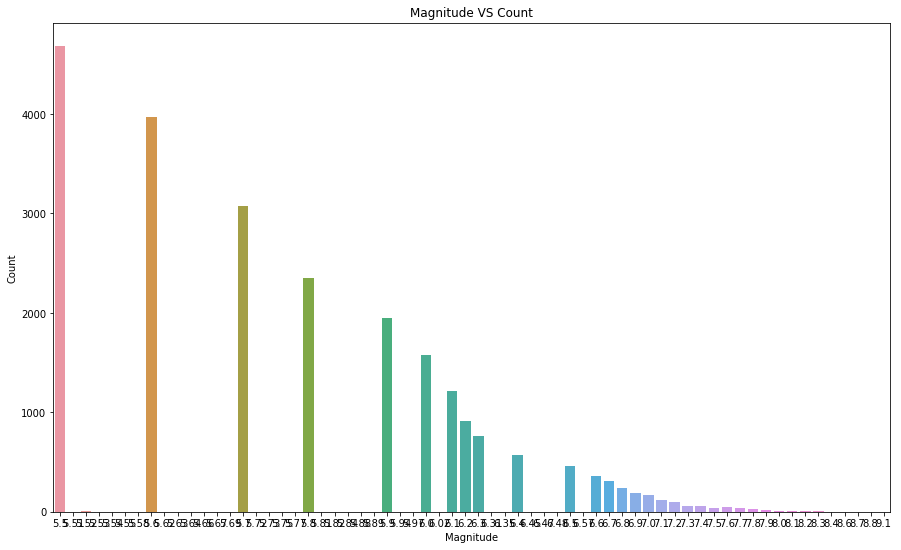

In [16]:
#Q3 - Classification based on Magnitude Value using bar chart
sns.countplot(x="Magnitude", data=backup_data)
plt.ylabel('Count')
plt.title('Magnitude VS Count')
plt.show()

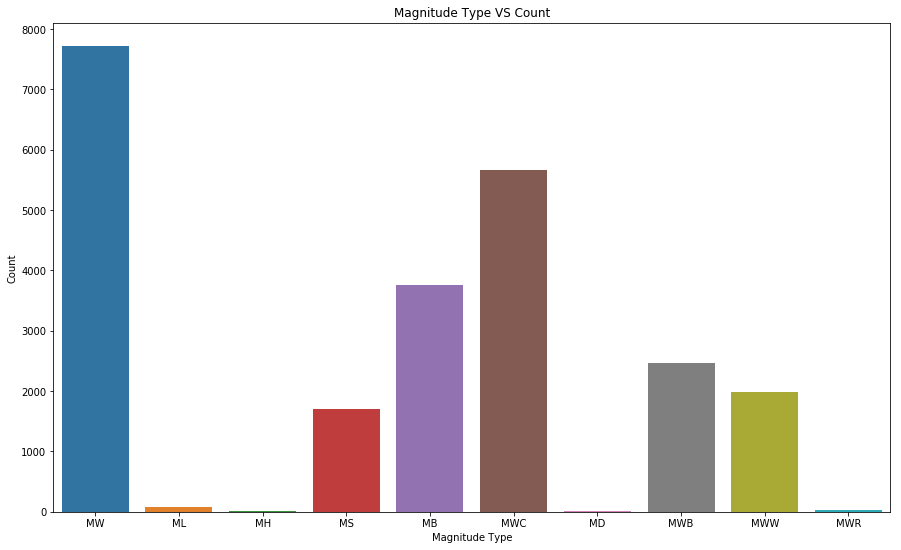

In [17]:
#Q4 - Classification based on Magnitude Type using bar chart
sns.countplot(x="Magnitude Type", data=backup_data)
plt.ylabel('Count')
plt.title('Magnitude Type VS Count')
plt.show()

Concluded that 'MW' is most frequent

------------------------------------------------------------------
------------------------------------------------------------------

Severity Band

Great: M > =8| |
Major: 7 < =M < 7.9| |
Strong: 6 < = M < 6.9| |
Moderate: 5.5 < =M < 5.9| |

In [18]:
#Q5 - Severity of the earthquake vs count
#Naming the data labels
backup_data.loc[backup_data['Magnitude'] > 8, 'Class'] = 'Great'
backup_data.loc[ (backup_data['Magnitude'] >= 7) & (backup_data['Magnitude'] < 7.9), 'Class'] = 'Major'
backup_data.loc[ (backup_data['Magnitude'] >= 6) & (backup_data['Magnitude'] < 6.9), 'Class'] = 'Strong'
backup_data.loc[ (backup_data['Magnitude'] >= 5.5) & (backup_data['Magnitude'] < 5.9), 'Class'] = 'Moderate'

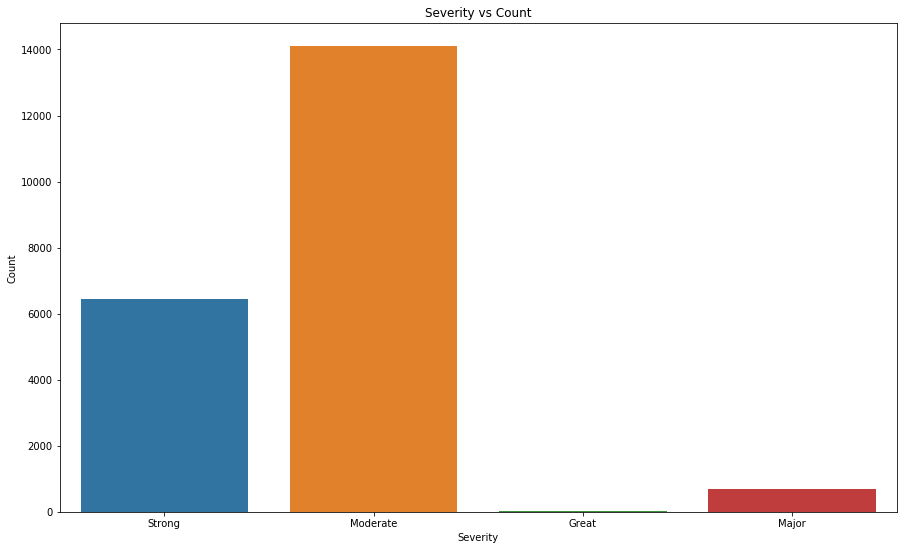

In [19]:
#Severity distribution using bar charts

sns.countplot(x="Class", data=backup_data)
plt.xlabel('Severity')
plt.ylabel('Count')
plt.title('Severity vs Count')
plt.show()

In [20]:
# Minumum magnitude
backup_data['Magnitude'].min()

5.5

In [21]:
# Maximum magnitude
backup_data['Magnitude'].max()

9.0999999999999996

In [22]:
Location = backup_data[backup_data['Magnitude'] > 8.5]
Location['Location Source'].value_counts()

US        5
ISCGEM    1
Name: Location Source, dtype: int64

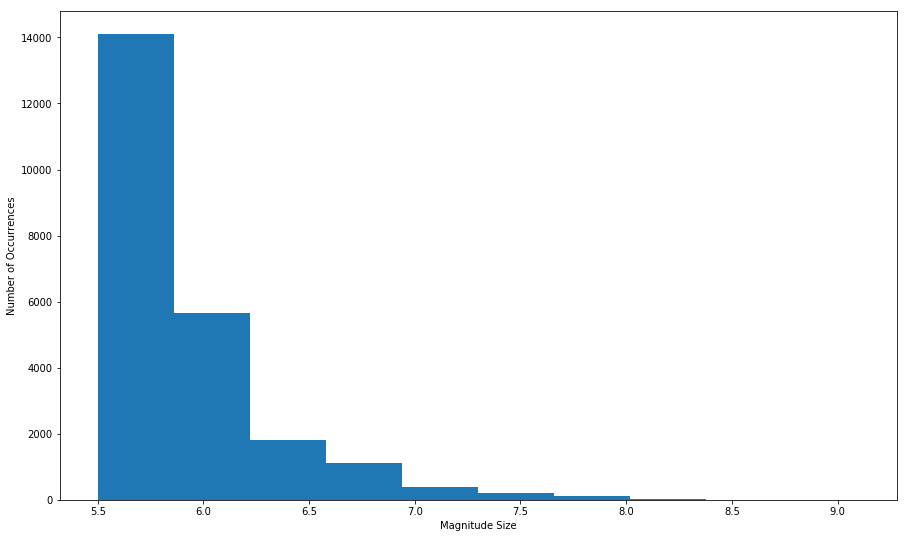

In [23]:
# Plot Distribution plot of 'Magnitude' values

plt.hist(backup_data['Magnitude'])
plt.xlabel('Magnitude Size')
plt.ylabel('Number of Occurrences')
plt.show()

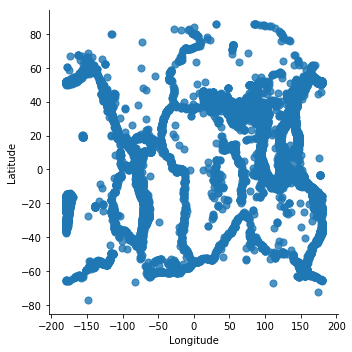

In [24]:
# Latitude vs Longitude
# Simple distribution  maping

plt.figure(figsize=(13, 10))

sns.lmplot('Longitude', 'Latitude',
           data=backup_data,
           fit_reg=False,
           scatter_kws={"marker": "D",
                        "s": 50})
plt.show()

Year-wise distribution of Earthquake occurances

In [25]:
import datetime
backup_data['Date'] = backup_data['Date'].apply(lambda x: pd.to_datetime(x))

In [26]:
backup_data['Year'] = backup_data['Date'].apply(lambda x: str(x).split('-')[0])

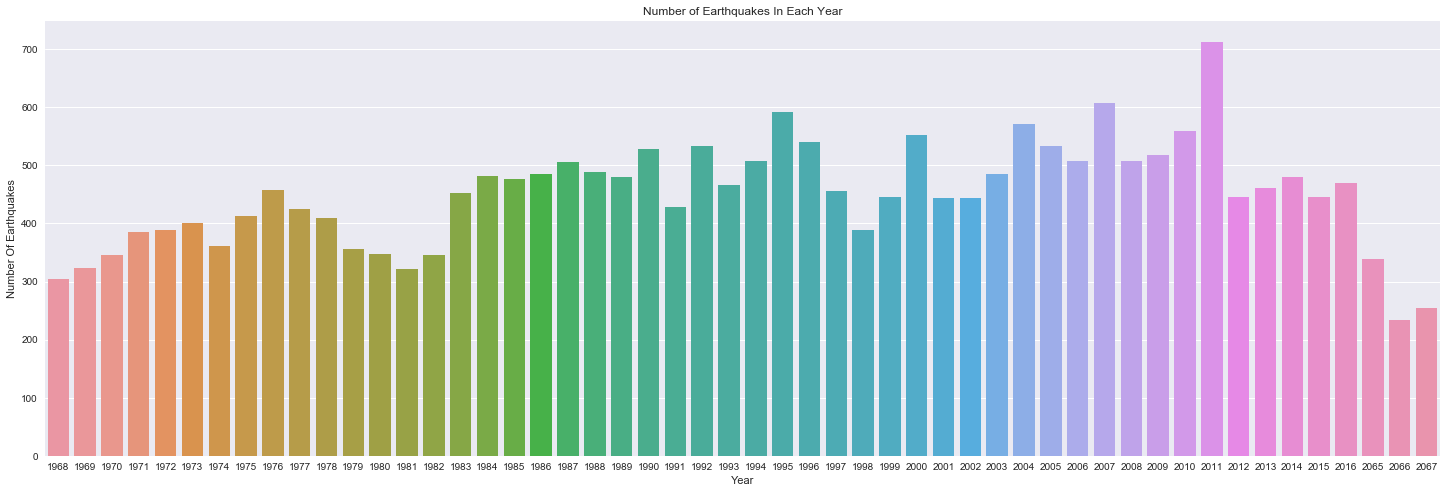

In [27]:
plt.figure(figsize=(25, 8))
sns.set(font_scale=1.0)
sns.countplot(x="Year", data=backup_data)
plt.ylabel('Number Of Earthquakes')
plt.title('Number of Earthquakes In Each Year')
plt.show()

Histograms

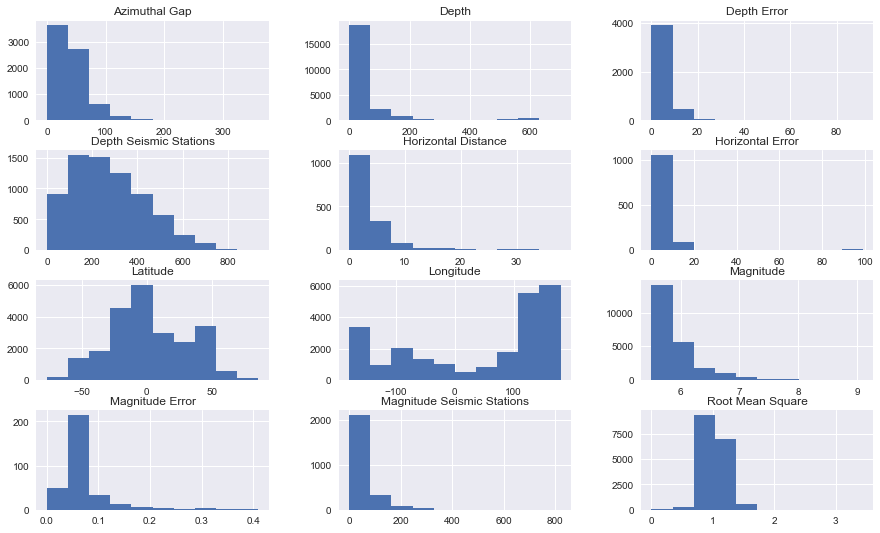

In [28]:
backup_data.hist()
plt.show()

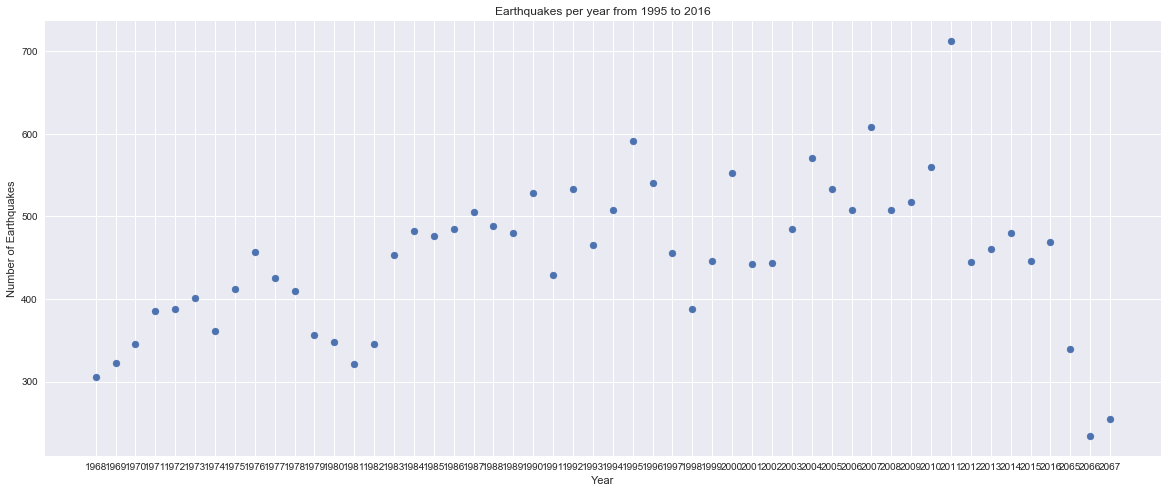

In [29]:
x = backup_data['Year'].unique()
y = backup_data['Year'].value_counts()

count = []
for i in range(len(x)):
    key = x[i]
    count.append(y[key])

plt.figure(figsize=(20, 8))

plt.scatter(x, count)
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Earthquakes per year from 1995 to 2016')
plt.show()

Relation between Magnitude and Depth

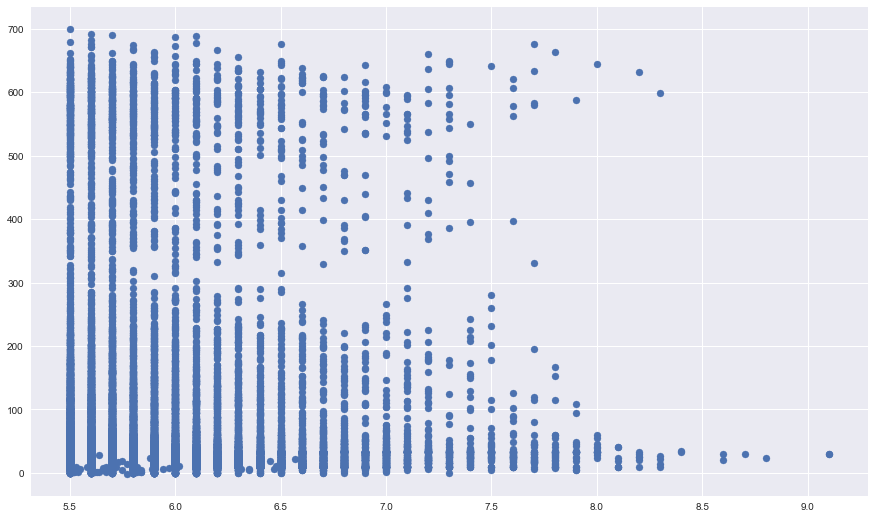

In [30]:
plt.scatter(backup_data["Magnitude"],backup_data["Depth"])
plt.show()

Longitude distribution plot

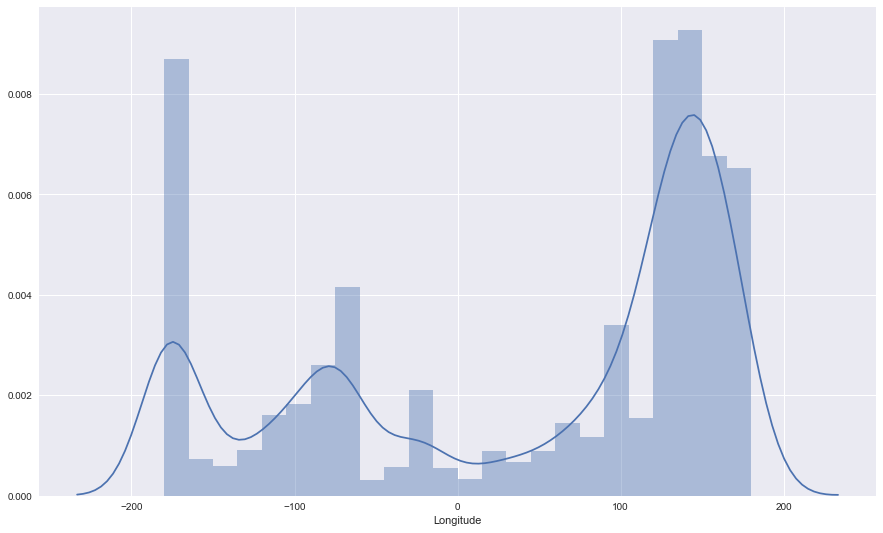

In [31]:
sns.distplot(backup_data['Longitude'])
plt.show()

           Magnitude     Depth  Longitude  Latitude
Magnitude   1.000000  0.023457   0.038579  0.034987
Depth       0.023457  1.000000  -0.085861 -0.081020
Longitude   0.038579 -0.085861   1.000000  0.203546
Latitude    0.034987 -0.081020   0.203546  1.000000


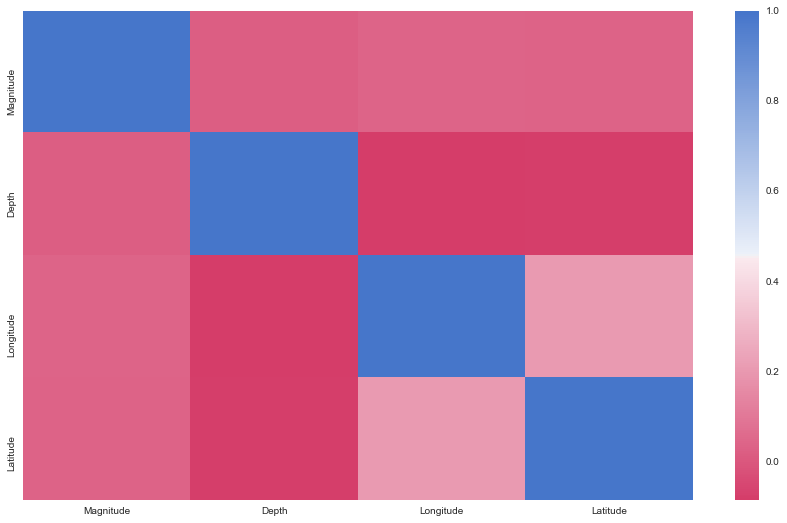

In [32]:
cmap = sns.diverging_palette(0,255,sep=1, n=256,as_cmap=True)
correlation=backup_data[['Magnitude','Depth','Longitude','Latitude']].corr()
print(correlation)
sns.heatmap(correlation, cmap=cmap)
plt.show()